<a href="https://colab.research.google.com/github/Elwing-Chou/tibaml0922/blob/main/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
# Series: df["sepal length (cm)"]
df["ans"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# 進入sklean以後, 我們就不要用df, numpy array
import numpy as np
from sklearn.model_selection import train_test_split

y = np.array(df["ans"])
# axis參數
x = np.array(df.drop(["ans"], axis=1))
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
# train_test_split([1, 2, 3, 4], ["a", "b", "c", "d"], test_size=0.25)
# numpy: .shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

[Text(390.6, 697.62, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [46, 46, 43]\nclass = setosa'),
 Text(330.50769230769237, 570.78, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(450.69230769230774, 570.78, 'petal width (cm) <= 1.75\ngini = 0.499\nsamples = 89\nvalue = [0, 46, 43]\nclass = versicolor'),
 Text(240.3692307692308, 443.94, 'petal length (cm) <= 4.95\ngini = 0.15\nsamples = 49\nvalue = [0, 45, 4]\nclass = versicolor'),
 Text(120.1846153846154, 317.1, 'petal width (cm) <= 1.65\ngini = 0.044\nsamples = 44\nvalue = [0, 43, 1]\nclass = versicolor'),
 Text(60.0923076923077, 190.26, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]\nclass = versicolor'),
 Text(180.27692307692308, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(360.55384615384617, 317.1, 'petal width (cm) <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = virginica'),
 Text(300.4615384615385, 190.26, 'gini = 0.0\nsamples = 2\nvalue 

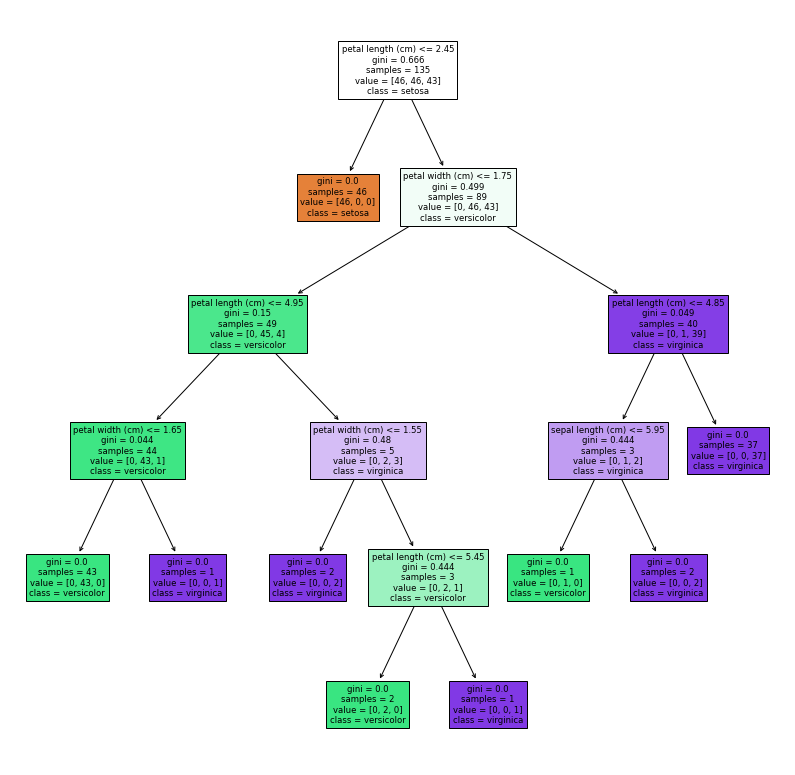

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14, 14))
plot_tree(clf,
          feature_names=iris["feature_names"],
          class_names=iris["target_names"],
          filled=True)

In [11]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre, y_test)

1.0